In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [3]:
# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv"
df = pd.read_csv(url)
print("Dataset shape:", df.shape)
print(df.head())
print(df.tail())
print(df.info())
print(df.describe)

Dataset shape: (200, 6)
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY
     Age Sex      BP Cholesterol  Na_to_K   Drug
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  199 non-null    object 
 4   Na_to_K      200 non-null    float64
 5

In [4]:
# Module 2: Data Transformation
print("\n--- Module 2: Data Transformation ---")


--- Module 2: Data Transformation ---


In [5]:
# Data deduplication
df_deduplicated = df.drop_duplicates()
print("Rows removed after deduplication:", len(df) - len(df_deduplicated))

Rows removed after deduplication: 0


In [6]:
# Discretization and binning
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 70, 100], labels=['0-18', '19-30', '31-50', '51-70', '71+'])

In [7]:
# Handling missing data using different methods
print("\nMissing values before imputation:")
print(df.isnull().sum())


Missing values before imputation:
Age            0
Sex            0
BP             0
Cholesterol    1
Na_to_K        0
Drug           1
Age_Group      0
dtype: int64


In [8]:
# Simple Imputer
imputer_simple = SimpleImputer(strategy='most_frequent')
df_imputed_simple = pd.DataFrame(imputer_simple.fit_transform(df), columns=df.columns)


In [11]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# KNN Imputer
imputer_knn = KNNImputer(n_neighbors=5)
df[numerical_cols] = imputer_knn.fit_transform(df[numerical_cols])

In [13]:
print("\nMissing values after Simple Imputation:")
print(df_imputed_simple.isnull().sum())
print("\nMissing values after KNN Imputation:")
print(df.isnull().sum())


Missing values after Simple Imputation:
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
Age_Group      0
dtype: int64

Missing values after KNN Imputation:
Age            0
Sex            0
BP             0
Cholesterol    1
Na_to_K        0
Drug           1
Age_Group      0
dtype: int64


In [14]:
# Module 3: Correlation Analysis and Time Series Analysis
print("\n--- Module 3: Correlation Analysis ---")


--- Module 3: Correlation Analysis ---


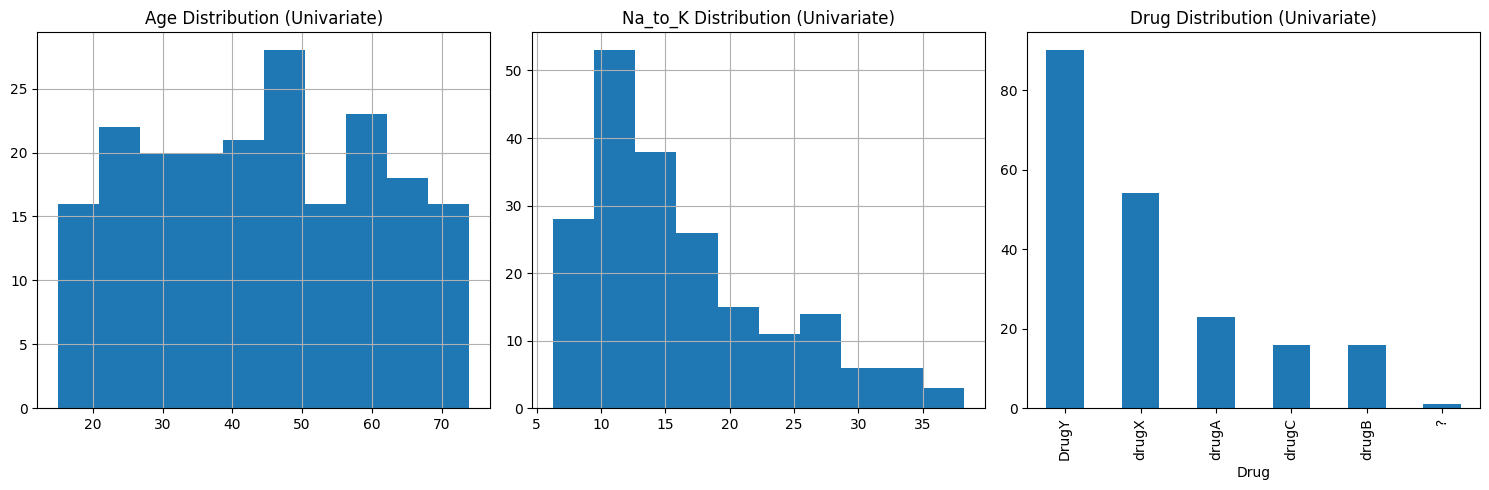

In [15]:
# Univariate analysis
plt.figure(figsize=(15, 5))
plt.subplot(131)
df_imputed_simple['Age'].hist()
plt.title('Age Distribution (Univariate)')
plt.subplot(132)
df_imputed_simple['Na_to_K'].hist()
plt.title('Na_to_K Distribution (Univariate)')
plt.subplot(133)
df_imputed_simple['Drug'].value_counts().plot(kind='bar')
plt.title('Drug Distribution (Univariate)')
plt.tight_layout()
plt.show()

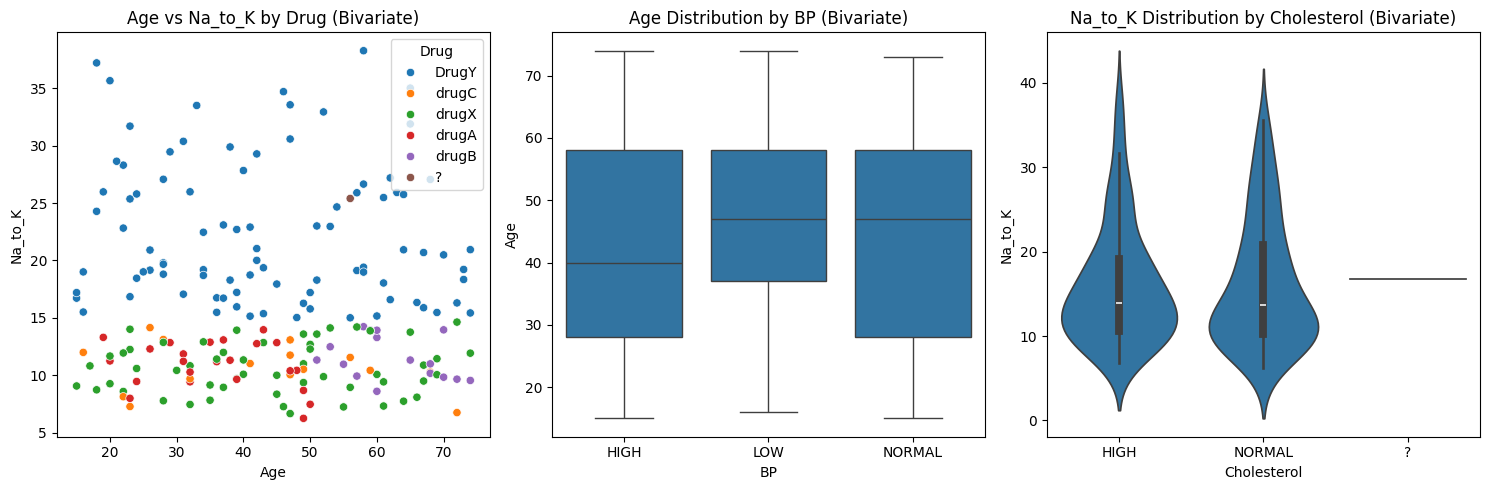

In [16]:
# Bivariate analysis
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.scatterplot(data=df_imputed_simple, x='Age', y='Na_to_K', hue='Drug')
plt.title('Age vs Na_to_K by Drug (Bivariate)')
plt.subplot(132)
sns.boxplot(data=df_imputed_simple, x='BP', y='Age')
plt.title('Age Distribution by BP (Bivariate)')
plt.subplot(133)
sns.violinplot(data=df_imputed_simple, x='Cholesterol', y='Na_to_K')
plt.title('Na_to_K Distribution by Cholesterol (Bivariate)')
plt.tight_layout()
plt.show()

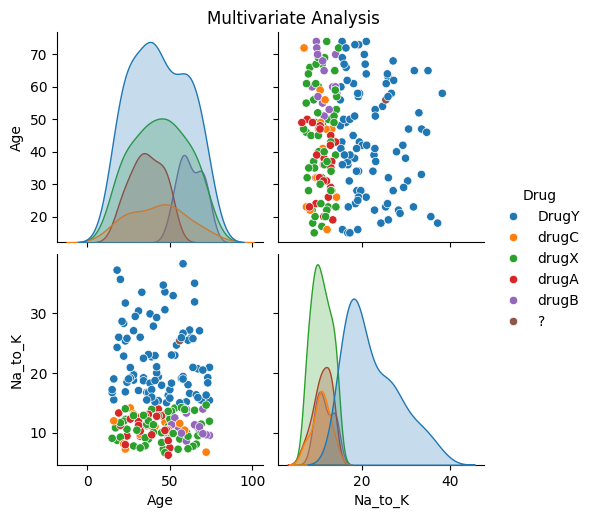

In [20]:
# Create the pairplot with only numerical variables
sns.pairplot(df_imputed_simple, hue='Drug', vars=['Age', 'Na_to_K'])
plt.suptitle('Multivariate Analysis', y=1.02)
plt.show()

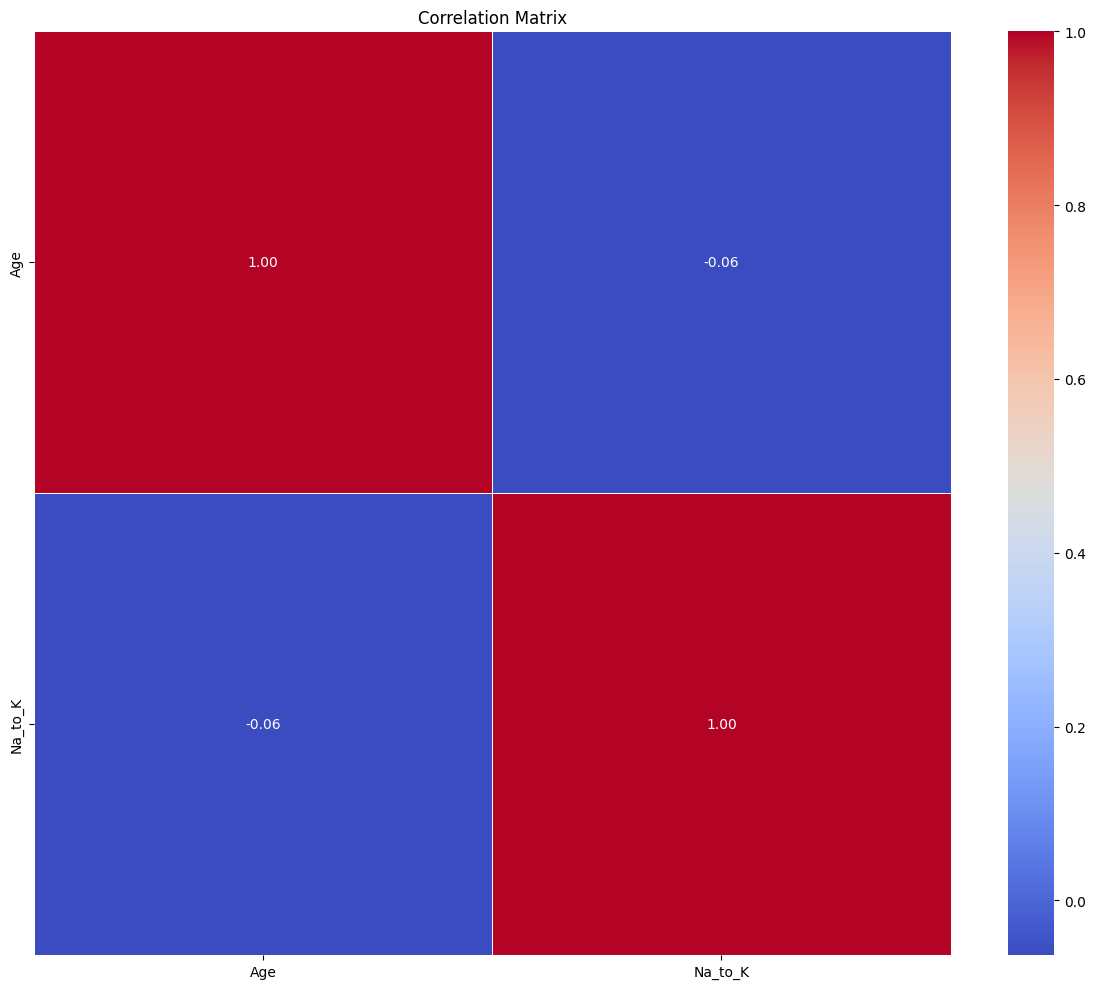

In [41]:
# Function to convert age ranges to numeric values
def age_to_numeric(age):
    if isinstance(age, str) and '-' in age:
        low, high = map(int, age.split('-'))
        return (low + high) / 2
    return age

# Apply the conversion to the Age column
df['Age'] = df['Age'].apply(age_to_numeric)

# Perform one-hot encoding for categorical variables
categorical_cols = ['Sex', 'BP', 'Cholesterol', 'Drug']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Drop rows with missing values
df_cleaned = df_encoded.dropna()

# Select only numeric columns for correlation
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_numeric = df_cleaned[numeric_cols]

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [27]:
# Module 4: Data Summarization and Visualization
print("\n--- Module 4: Data Summarization and Visualization ---")


--- Module 4: Data Summarization and Visualization ---


In [28]:
# Statistical summary
print("Statistical Summary:")
print(df_imputed_simple.describe())

Statistical Summary:
        Age  Sex    BP Cholesterol  Na_to_K   Drug Age_Group
count   200  200   200         200  200.000    200       200
unique   57    2     3           3  198.000      6         5
top      47    M  HIGH        HIGH   12.006  DrugY     31-50
freq      8  104    77         103    2.000     90        79


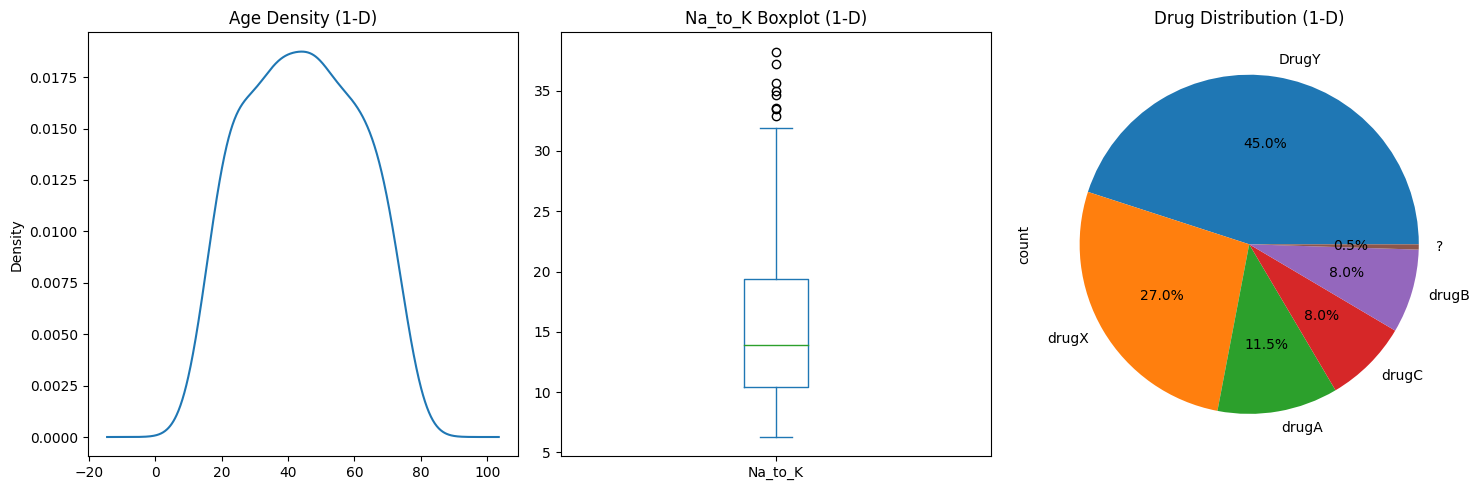

In [29]:
# 1-D Statistical data analysis
plt.figure(figsize=(15, 5))
plt.subplot(131)
df_imputed_simple['Age'].plot(kind='kde')
plt.title('Age Density (1-D)')
plt.subplot(132)
df_imputed_simple['Na_to_K'].plot(kind='box')
plt.title('Na_to_K Boxplot (1-D)')
plt.subplot(133)
df_imputed_simple['Drug'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Drug Distribution (1-D)')
plt.tight_layout()
plt.show()

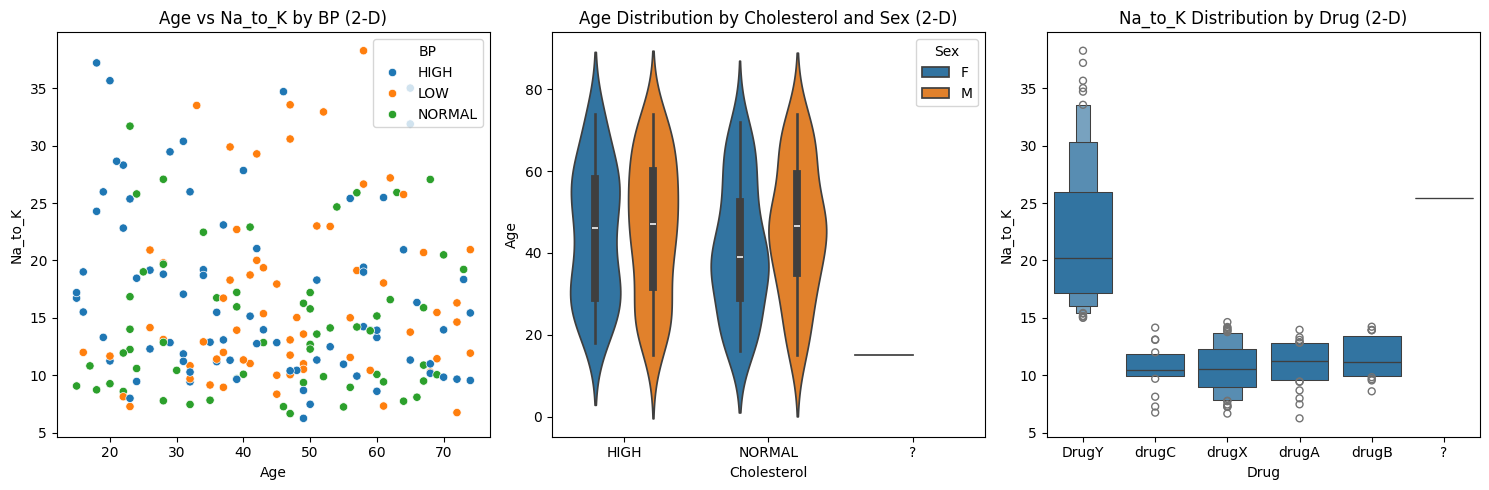

In [30]:
# 2-D Statistical data analysis
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.scatterplot(data=df_imputed_simple, x='Age', y='Na_to_K', hue='BP')
plt.title('Age vs Na_to_K by BP (2-D)')
plt.subplot(132)
sns.violinplot(data=df_imputed_simple, x='Cholesterol', y='Age', hue='Sex')
plt.title('Age Distribution by Cholesterol and Sex (2-D)')
plt.subplot(133)
sns.boxenplot(data=df_imputed_simple, x='Drug', y='Na_to_K')
plt.title('Na_to_K Distribution by Drug (2-D)')
plt.tight_layout()
plt.show()

In [31]:
# Contingency tables and mosaic plot
cont_table = pd.crosstab(df_imputed_simple['BP'], df_imputed_simple['Cholesterol'])
print("\nContingency Table (BP vs Cholesterol):")
print(cont_table)


Contingency Table (BP vs Cholesterol):
Cholesterol  ?  HIGH  NORMAL
BP                          
HIGH         1    35      41
LOW          0    31      33
NORMAL       0    37      22


<Figure size 1000x800 with 0 Axes>

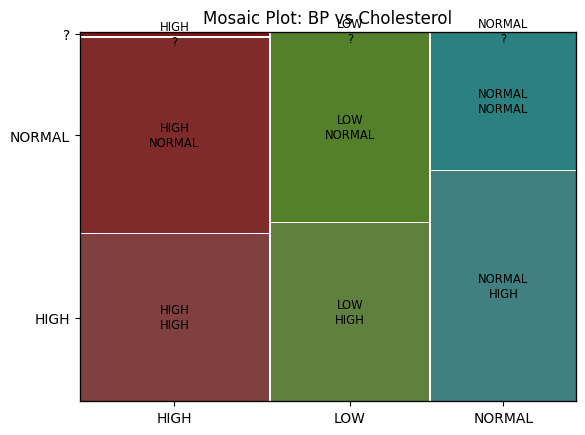

In [32]:
plt.figure(figsize=(10, 8))
mosaic(df_imputed_simple, ['BP', 'Cholesterol'])
plt.title('Mosaic Plot: BP vs Cholesterol')
plt.show()

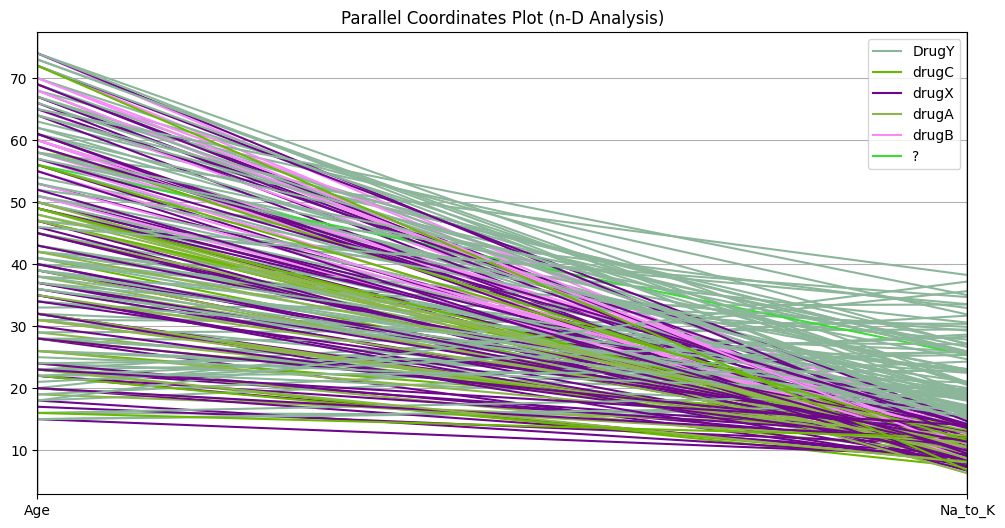

In [33]:
# n-D Statistical data analysis (using parallel coordinates plot)
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df_imputed_simple, 'Drug', cols=['Age', 'Na_to_K'])
plt.title('Parallel Coordinates Plot (n-D Analysis)')
plt.show()

In [34]:
print("\n--- Module 5: Clustering Algorithms ---")


--- Module 5: Clustering Algorithms ---


In [38]:
# Prepare data for clustering
le = LabelEncoder()
df_encoded = df_imputed_simple.copy()
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    df_encoded[col] = le.fit_transform(df_encoded[col])